<a href="https://colab.research.google.com/github/chripark123/Unit2Project/blob/main/LGA_PythonProject_SchoolData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plot
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

pick any school in this dataset as an initial comparison point

pick a feature/measure/score

compare above school to schools in the entire dataset, schools in a
particular borough, or schools in a particular district - you only need
to do one additional comparison point (but you’re welcome to do
more comparisons if you feel compelled to do so)

the analysis should include some descriptive statistics

the analysis should include one cleaning task (or more)


In [ ]:
#Text to Numeric for Mean Score
df['Mean Score'] = pd.to_numeric(df['Mean Score'], errors='coerce') # Convert text to numeric and parse errors
df = df.dropna(subset=['Mean Score'])

df.head(30)

In [ ]:
#1: Pick a School:

school = "P.S. 188 The Island School"
school_data = df[df["School Name"] == school]

school2 = 'P.S. 184m Shuang Wen'
school_data2 = df[df["School Name"] == school2]


In [ ]:
#2: Comparison using Descriptive Statistics:

average_score_school1 = school_data['Mean Score'].mean()
average_score_school2 = school_data2['Mean Score'].mean()

print(f"The average score for {school} is: {average_score_school1}")
print(f"The average score for {school2} is: {average_score_school2}")

total_tested_by_year_school1 = school_data.groupby(['School Name','Year'])['Total Tested'].sum()
total_tested_by_year_school2 = school_data2.groupby(['School Name','Year'])['Total Tested'].sum()

print("\nTotal Tested by Year:")
print(total_tested_by_year_school1)
print(total_tested_by_year_school2)

average_score_by_year_school1 = school_data.groupby(['School Name','Year'])['Mean Score'].mean()
average_score_by_year_school2 = school_data2.groupby(['School Name','Year'])['Mean Score'].mean()

print("\nAverage scores by school year:")
print(average_score_by_year_school1)
print(average_score_by_year_school2)

average_score_by_subject_school1 = school_data.groupby(['School Name','Regents Exam'])['Mean Score'].mean()
average_score_by_subject_school2 = school_data2.groupby(['School Name','Regents Exam'])['Mean Score'].mean()

print("\nAverage scores by Regents Exam:")
print(average_score_by_subject_school1)
print(average_score_by_subject_school2)


The average score for P.S. 188 The Island School is: 65.39047619047619
The average score for P.S. 184m Shuang Wen is: 82.0

Total Tested by Year:
School Name                 Year
P.S. 188 The Island School  2015     81
                            2016    135
                            2017     64
Name: Total Tested, dtype: int64
School Name           Year
P.S. 184m Shuang Wen  2015    176
                      2016    175
                      2017    443
Name: Total Tested, dtype: int64

Average scores by school year:
School Name                 Year
P.S. 188 The Island School  2015    62.333333
                            2016    65.700000
                            2017    68.440000
Name: Mean Score, dtype: float64
School Name           Year
P.S. 184m Shuang Wen  2015    78.480000
                      2016    79.800000
                      2017    84.383333
Name: Mean Score, dtype: float64

Average scores by Regents Exam:
School Name                 Regents Exam       
P.S. 188 

<Figure size 1000x500 with 0 Axes>

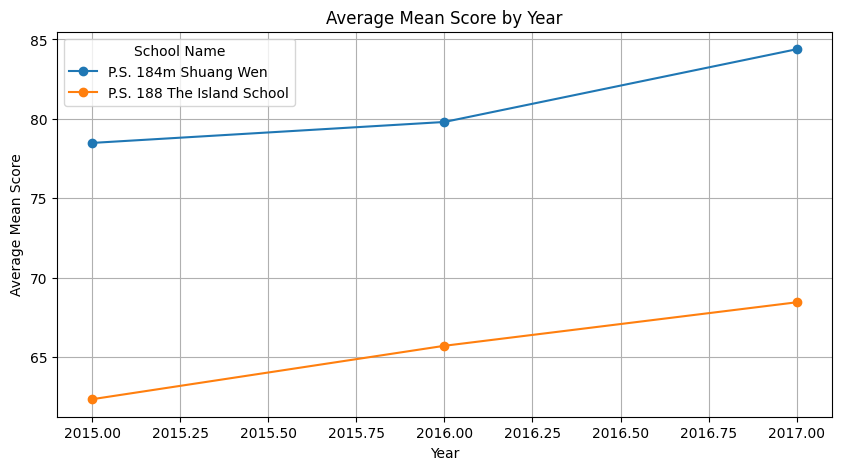

In [ ]:
#Visualization:

compare_schools = ["P.S. 188 The Island School", "P.S. 184m Shuang Wen"]
filtered_df = df[df["School Name"].isin(compare_schools)]

# Group by year and school, then calculate the average Mean Score
avg_mean_scores = filtered_df.groupby(["Year", "School Name"])["Mean Score"].mean().unstack()

# Plot the data
plt.figure(figsize=(10, 5))
avg_mean_scores.plot(marker="o", linestyle="-", figsize=(10, 5))

# Customize plot
plt.title("Average Mean Score by Year")
plt.xlabel("Year")
plt.ylabel("Average Mean Score")
plt.legend(title="School Name")
plt.grid(True)

# Show the plot
plt.show()